In [1]:
from transformers import set_seed
from transformers import AutoModelForCausalLM, AutoTokenizer
import re
import pandas as pd
import torch
from transformers import BertModel, BertTokenizer
from torch import nn

/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._

In [1]:
from zephyrusllm import ZephyrusLLM
from taskallocator import TaskAllocator
from trainer import Trainer
from datapreprocessor import DataPreProcessor
from inference import Inference

/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/opt/homebrew/Caskroom/miniforge/base/envs/task_whiz/lib/python3.8/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._

In [2]:
# Example Usage
zephyrus_llm = ZephyrusLLM()


model.safetensors.index.json: 100%|██████████| 23.9k/23.9k [00:00<00:00, 7.30MB/s]
model-00001-of-00008.safetensors: 100%|██████████| 1.89G/1.89G [03:30<00:00, 8.99MB/s]
model-00002-of-00008.safetensors:   9%|▉         | 178M/1.95G [00:18<03:07, 9.42MB/s]


KeyboardInterrupt: 

In [6]:
file_path = "/content/drive/MyDrive/Task_Whiz/clean_data.csv"
data = pd.read_csv(file_path) # Replace with your file path
employee_name = "Janvi Arya"  # Replace with the name you're searching for

review = zephyrus_llm.generate_employee_review(data, employee_name)
print(review)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1473: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/nn/modules.py:226: UserWarning: Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.
  warnings.warn(f'Input type into Linear4bit is torch.float16, but bnb_4bit_compute_type=torch.float32 (default). This will lead to slow inference or training speed.')


Janvi Arya, a Senior HR, for 12 years, has made a considerable contribution to our organization. With 23 completed projects, her exceptional knowledge and management skills of HR services have been essential in leading projects that are well-done within their given timeline. Her current rating of 9, over five absences, shows that she works effectively even with her high-stress and burnout score of 2. She maintains high morale and has been a valuable asset for the past 12 years. Focusing on managing stress effectively and further improving ongoing project productivity could be her significant areas of growth.


highly_correlated_features = {'Years in the company'}
Data shape: (537, 25)


<ipython-input-8-87431132b3c6>:16: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


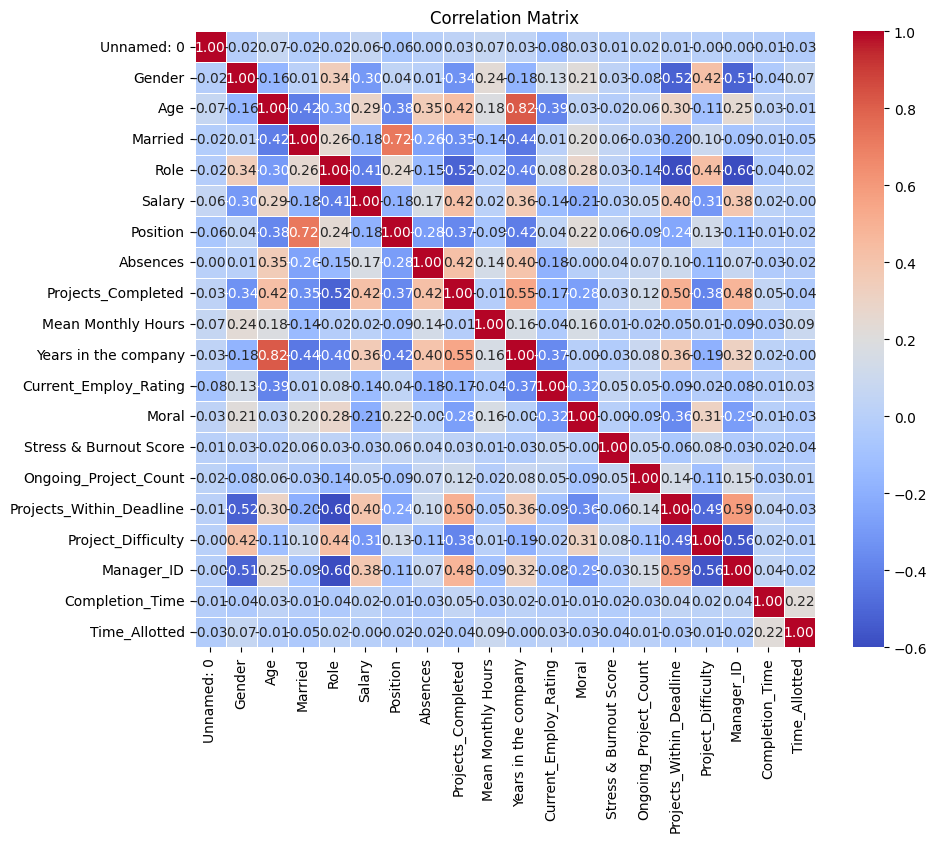

Stress Score Prediction Accuracy: 0.27


<ipython-input-8-87431132b3c6>:16: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


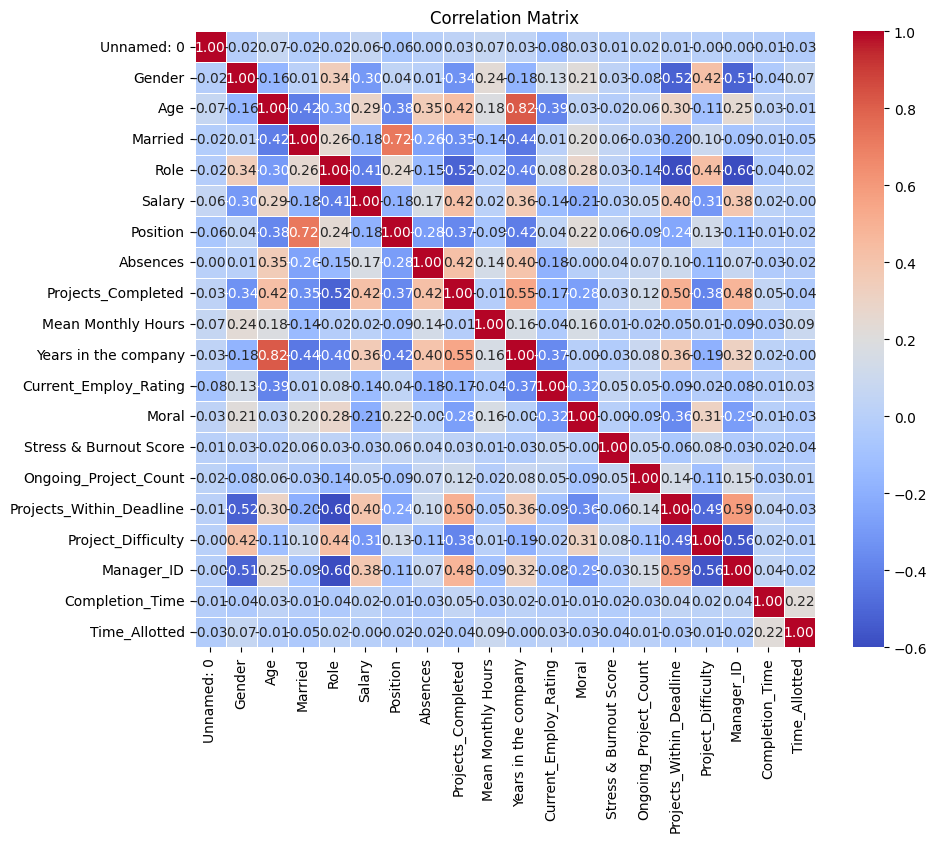

Moral Prediction Accuracy: 0.56


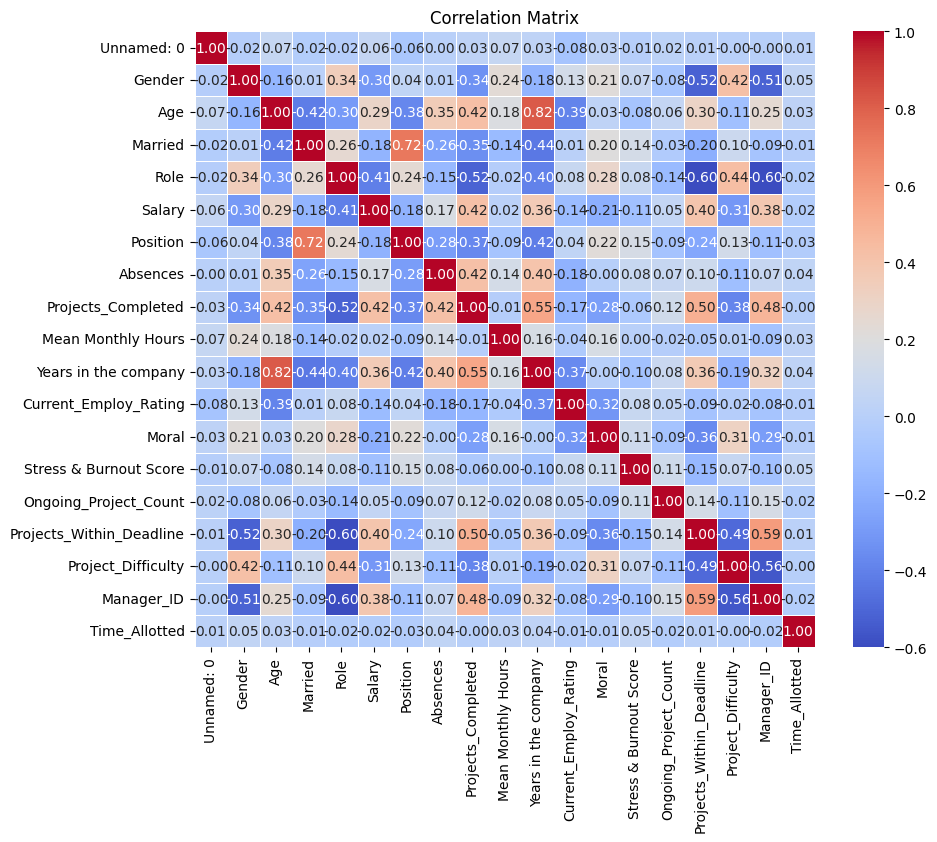

highly_correlated_features = {'Years in the company'}
Completion Time Prediction RMSE: 57208.951912383556


In [9]:
# Example usage
file_path = '/content/drive/MyDrive/Task_Whiz/clean_data.csv'
output_dir = '/content/drive/MyDrive/Task_Whiz/models'  # Specify your output directory path
preprocessor = DataPreProcessor(file_path)
trainer = Trainer(preprocessor, output_dir)

# Train for each task and save the models
trainer.train_stress_score()
trainer.train_moral()
trainer.train_completion_time()


In [11]:
# Make predictions
# Example usage
data_path = '/content/drive/MyDrive/Task_Whiz/clean_data.csv'
models_dir = '/content/drive/MyDrive/Task_Whiz/models'
inference = Inference(data_path, models_dir)
name = 'Ram Prasad'
stress_scores = inference.predict_stress_score(name)
moral_scores = inference.predict_moral(name)
completion_times = inference.predict_completion_time(name)

Data shape: (537, 25)


In [12]:
task_allocator = TaskAllocator('bert-base-uncased', 4)

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [13]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install flask flask-ngrok pyngrok

In [14]:
!ngrok config add-authtoken 2a4mgkwCTTfXOprlHh4bxBIUPGe_2vYNE8XbznRshSAQdPA8e

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [24]:
 #'http://127.0.0.1:5000/process_task'

import os
import threading

from flask import Flask
from pyngrok import ngrok

app = Flask(__name__)
port = "5000"

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url


# Load the data
@app.route('/process_task', methods=['POST'])
def process_task():

  # return "raghav"
    print("hello")
    data = pd.read_csv("clean_data.csv",encoding="UTF-8")
    content = request.json
    task_description = content['task']

    print(content, task_description)

    # Decompose the task into subtasks
    subtasks = zephyrus_llm.decompose_task(task_description)

    # Allocate subtasks to employees
    allocation_results = task_allocator.allocate_subtasks(subtasks, data)

    # Enhance allocation_results to include employee reviews
    enhanced_allocations = {}
    for subtask, employee_name in allocation_results.items():
        review = zephyrus_llm.generate_employee_review(data, employee_name)
        enhanced_allocations[subtask] = {
            "employee_name": employee_name,
            "review": review
        }

    # Format the response
    response = {
        'task': task_description,
        'allocations': enhanced_allocations
    }

    return jsonify(response)

@app.route('/process_task', methods=['GET'])
def swati():
  return "raghav"

threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunnel "https://ab52-34-125-91-82.ngrok-free.app" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


In [21]:
!kill -9 2522
# !pidof ngrok

In [20]:
!lsof -i :5000

COMMAND PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
python3 723 root   90u  IPv4  85812      0t0  TCP localhost:5000 (LISTEN)


In [ ]:
# import os
# import threading

# from flask import Flask
# from pyngrok import ngrok

# app = Flask(__name__)
# port = "5000"

# # Open a ngrok tunnel to the HTTP server
# public_url = ngrok.connect(port).public_url
# print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

# # Update any base URLs to use the public ngrok URL
# app.config["BASE_URL"] = public_url

# # ... Update inbound traffic via APIs to use the public-facing ngrok URL


# # Define Flask routes
# @app.route("/")
# def index():
#     return "Hello from Colab!"

# # Start the Flask server in a new thread
# threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

In [ ]:
# #'http://127.0.0.1:5000/get_scores'

# from flask import Flask, request, jsonify

# app = Flask(__name__)

# # Assuming the Inference class is already defined

# models_dir = '/content/drive/MyDrive/Task_Whiz/models'
# inference = Inference(data_path, models_dir)

# @app.route('/get_scores', methods=['POST'])
# def get_scores():

#     data_path = '/content/drive/MyDrive/Task_Whiz/clean_data.csv'
#     content = request.json
#     names = content['names']

#     results = {}
#     for name in names:
#         stress_score = inference.predict_stress_score(name)
#         moral_score = inference.predict_moral(name)
#         completion_time = inference.predict_completion_time(name)

#         results[name] = {
#             'stress_score': stress_score,
#             'moral_score': moral_score,
#             'completion_time': completion_time
#         }

#     return jsonify(results)

# if __name__ == '__main__':
#     app.run(debug=True)
